In [17]:
import pandas as pd
from pandas import DataFrame
from datetime import datetime as dt
from datetime import timedelta 
from matplotlib import pyplot as plot
from matplotlib.dates import DateFormatter

DATE_FORMATTER = DateFormatter("%d-%m-%Y")
DATE_TIME_FORMATTER = DateFormatter("%d-%m-%Y %H:%M:%S")

def read_data(path: str):
    df = pd.read_csv(path, sep=';')
    df = df.assign(date_time=pd.to_datetime(df['Timestamp']))
    df = df.assign(date=df['date_time'].map(lambda r: r.date()))
    df = df.assign(time=df['date_time'].map(lambda r: r.time()))
    df = df.assign(time_delta=df['date_time'].diff())
    df.loc[0, 'time_delta'] = timedelta()
    df = df.assign(time_delta=df['time_delta'].apply(lambda h: h.total_seconds() / 60 / 60))
    df = df.assign(time_delta_average=df['time_delta'].rolling(3).mean())
    return df


def plot_time_delta(df: DataFrame, title: str):
    time_delta_mean = round(df['time_delta'].mean(), ndigits=2)
    ax = df.plot(x="date_time", y=["time_delta","time_delta_average"], xlabel="Time", ylabel=["Hours", "Moving Avg."], marker='o')
    bx = df.plot(x="date_time", y=["time_delta_average"], xlabel="Avg. Time", ylabel=["Avg. Hours"], marker='o')
    ax.xaxis.set_major_formatter(DATE_TIME_FORMATTER)
    
    plot.xticks(rotation=45, ha='right')
    ax.legend([f"Time Delta (Avg:{time_delta_mean}) Hrs"])
    ax.set_title(f"{title} Daily Time Delta Between Intake")
    ax.grid()
    plot.show()
    
def plot_daily_time_delta(df: DataFrame, title: str):
    daily_time_delta = df.groupby(['date'])['time_delta'].mean()
    ax = daily_time_delta.plot(x="date", y=["time_delta"], xlabel="Date", ylabel="Delta Hours", marker='o')
    ax.xaxis.set_major_formatter(DATE_FORMATTER)
    plot.xticks(rotation=45, ha='right')
    ax.legend([f"Time Delta By Day"])
    ax.set_title(f"{title} Time Delta Between Intake")
    ax.grid()
    plot.show()


def plot_daily_intake(df: DataFrame, title: str):
    daily_intake = df.groupby(['date'])['Dose'].sum()
    ax = daily_intake.plot(x="date", y=["Dose"], xlabel="Date", ylabel=f"{title} Dose", marker='o')
    ax.xaxis.set_major_formatter(DATE_FORMATTER)
    daily_intake_max = df.groupby(['date'])['Dose'].sum().max()
    daily_intake_min = df.groupby(['date'])['Dose'].sum().min()
    ax.legend([f"Dose (Min:{daily_intake_min}, Max:{daily_intake_max})"])
    ax.set_title(f"{title} Daily Intake")
    plot.xticks(rotation=45, ha='right')
    ax.grid()
    plot.show()
    
def plot_hourly_pain_episodes(df: DataFrame):
    hours_data = [0 for i in range(0, 24)]
    hours = ["{:02d}:00".format(i) for i in range(0, 24)]
    
    data_counts = df.groupby([lambda i: df.loc[i]['time'].hour])['Intensity'].count()

    for index in data_counts.index: 
        hours_data[index]=data_counts.loc[index]
    ax = plot.bar(hours,hours_data,label=hours)
    plot.xticks(rotation=45, ha='right')
    

In [18]:
def plot_hourly_pain_intensity(df: DataFrame):
    hours_data = [0 for i in range(0, 24)]
    hours = ["{:02d}:00".format(i) for i in range(0, 24)]

    data_intensity = df.groupby([lambda i: df.loc[i]['time'].hour])['Intensity'].sum()

    for index in data_intensity.index: 
        hours_data[index]=data_intensity.loc[index]
    ax = plot.bar(hours,hours_data,label="Pain Intensity By Hour of The Day")
    plot.xticks(rotation=45, ha='right')

In [19]:
DATA_DEF = [
    {'name': 'Oxycodone', 'path': 'data/oxycodone.csv'}, 
    #{'name': 'CBD Capsule', 'path': 'data/CBD-Capsules.csv'},
    #{'name': 'CBD Patches', 'path': 'data/CBD-Patches.csv'},
]

**Intake Data**

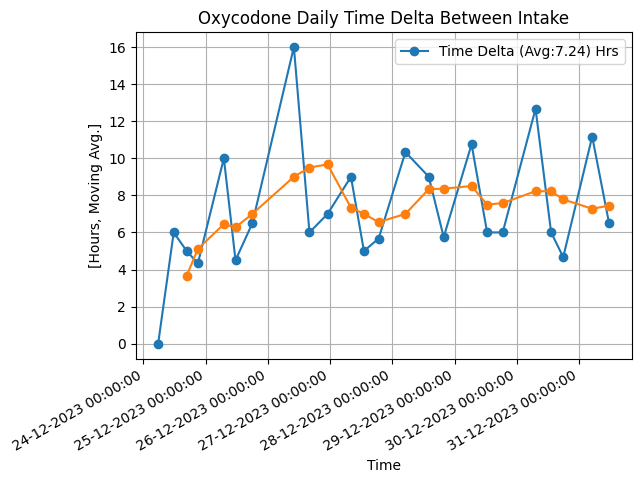

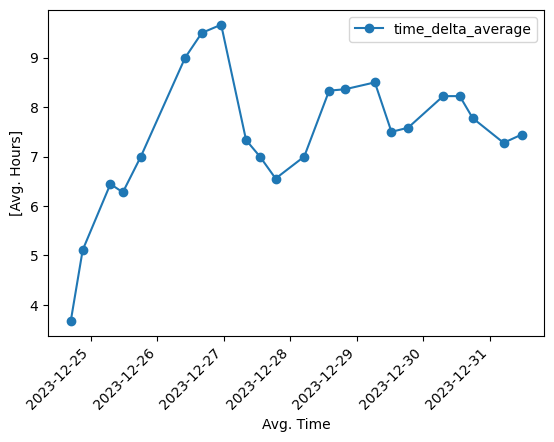

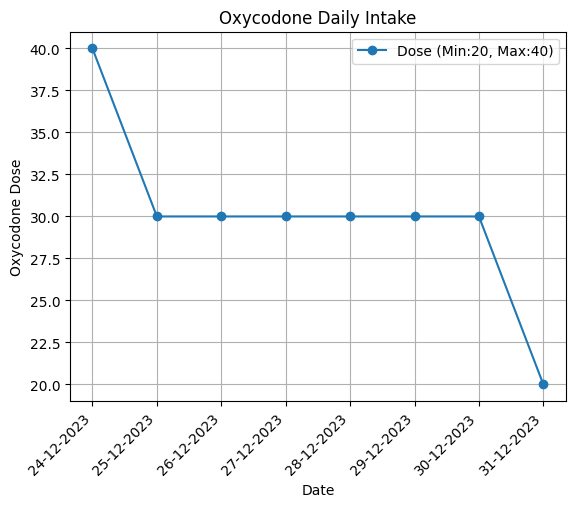

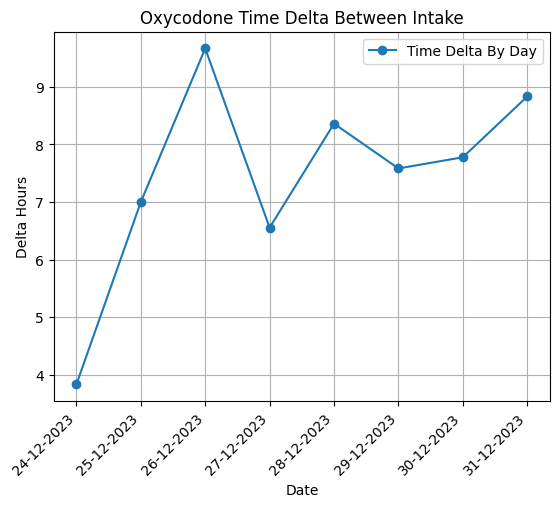

In [20]:
for data in DATA_DEF:
    df = read_data(data['path'])
    plot_time_delta(df, data['name'])
    plot_daily_intake(df, data['name'])
    plot_daily_time_delta(df, data['name'])

**Pain Data**

In [21]:
df_pain = read_data('data/pain.csv')

**Pain Episodes By Hour Of The Day**

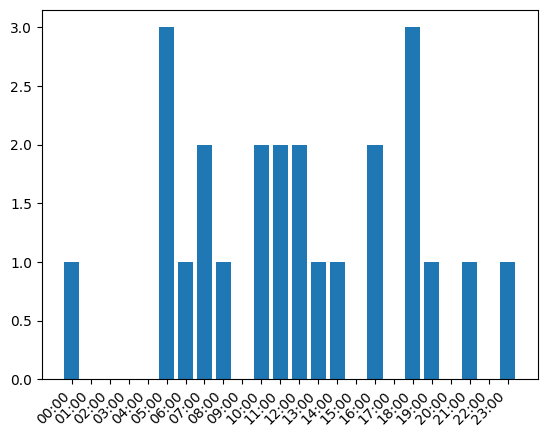

In [22]:
plot_hourly_pain_episodes(df_pain)

**Pain Intensity By Hour Of The Day**

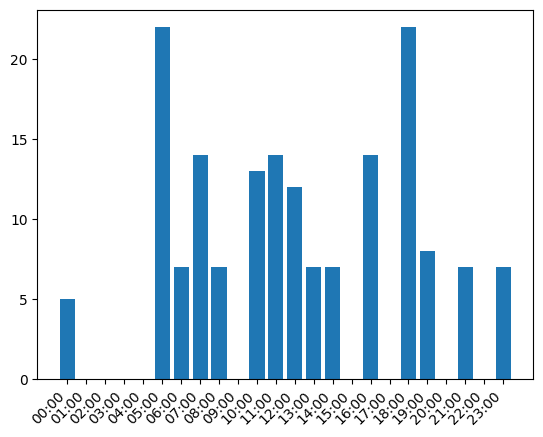

In [23]:
plot_hourly_pain_intensity(df_pain)